# Метод опорных векторов

In [1]:
import numpy
import pylab
import numpy.random
import sklearn.datasets
import sklearn.decomposition
import sklearn.cross_validation as cv
import sklearn.svm
import pandas as pd
import matplotlib as plt
from sklearn import metrics, datasets
from sklearn.cross_validation import train_test_split

%pylab inline

/usr/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Функция `select_model` принимает на вход обучающую выборку и возвращает модель (метод опорных векторов) с наилучшими параметрами (accuracy) для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($ 0.1, 1, 10$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    for kernel in ["linear", "rbf", "poly", "sigmoid"]: 
        for c in [0.1,1,10]:
            model = sklearn.svm.SVC(kernel=kernel , C=c)
            #print "Trying model {}".format(model)
            accuracy = numpy.mean(cv.cross_val_score(model, x, y, cv=10, scoring='accuracy'))
            if accuracy > best_accuracy or not best_model:
                best_model = model
                best_accuracy = accuracy
    best_model.fit(x, y)
    print "Best model {}".format(best_model)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    pylab.figure(figsize=(8, 8))

    colors = numpy.array(['r', 'b'])[y]
    pylab.title(description, fontsize='small')
    pylab.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = numpy.meshgrid(numpy.linspace(x1_min, x1_max, n_points), numpy.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(numpy.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    pylab.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    pylab.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Применим реализованную функцию `select_model` для нескольких синтетических и одного реального набора данных.

## Данные с линейной границей

Generating 'Linearly-separated' data set
Best model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Plotting data set points
Plotting decision region


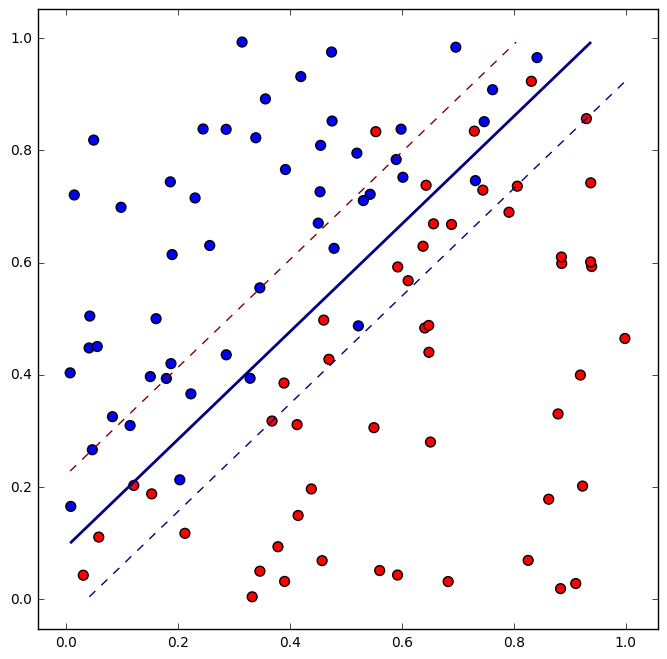

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = numpy.random.random((size, 2))
    y = numpy.zeros(size, dtype=int)
    noise = numpy.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Концентрические окружности

Generating 'Concentric circles' data set
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Plotting data set points
Plotting decision region


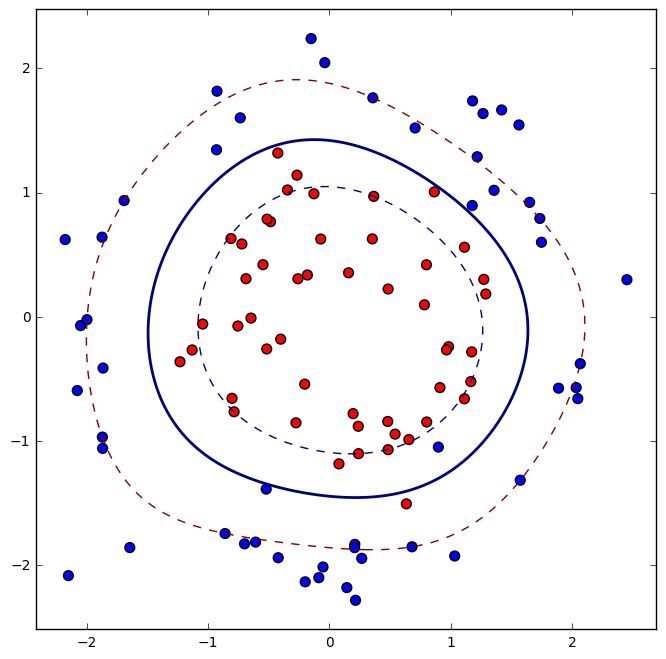

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = numpy.zeros((size, 2))
    x[:size/2, 0] = sigma * numpy.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * numpy.random.randn(size/2) + r2
    x[:, 1] = (numpy.random.random(size) - 0.5) * 2 * numpy.pi
    y = numpy.hstack([numpy.zeros(size/2, dtype=int), numpy.ones(size/2, dtype=int)])

    z = numpy.zeros((size, 2))
    z[:, 0] = x[:, 0] * numpy.cos(x[:, 1])
    z[:, 1] = x[:, 0] * numpy.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Смесь гауссовских распределений

Generating 'Gaussian mixture' data set
Best model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Plotting data set points
Plotting decision region


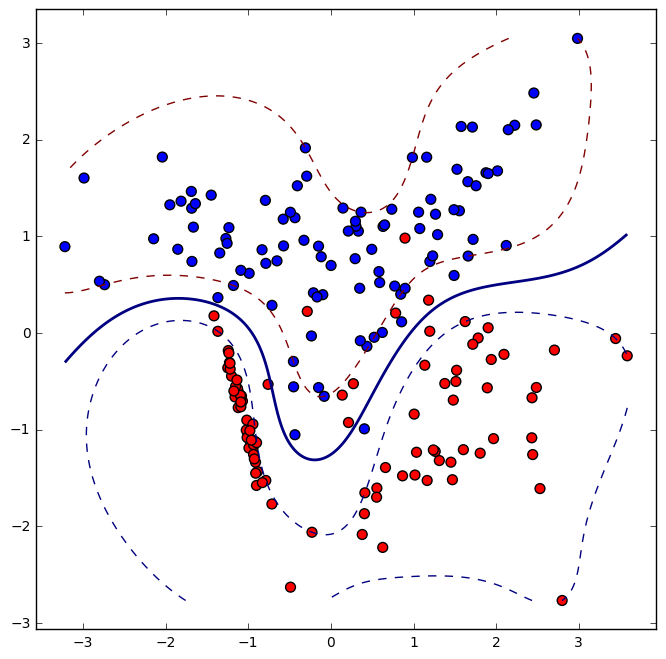

In [6]:
def generate_gauss(size=200):
    print "Generating 'Gaussian mixture' data set"

    x, y = sklearn.datasets.make_classification(n_samples=size,
                                                n_features=2,
                                                n_informative=2,
                                                n_redundant=0,
                                                n_classes=2,
                                                n_clusters_per_class=2)
    return x, y

x, y = generate_gauss()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Синусоидальная граница

Generating 'Sinus-separated' data set
Best model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Plotting data set points
Plotting decision region


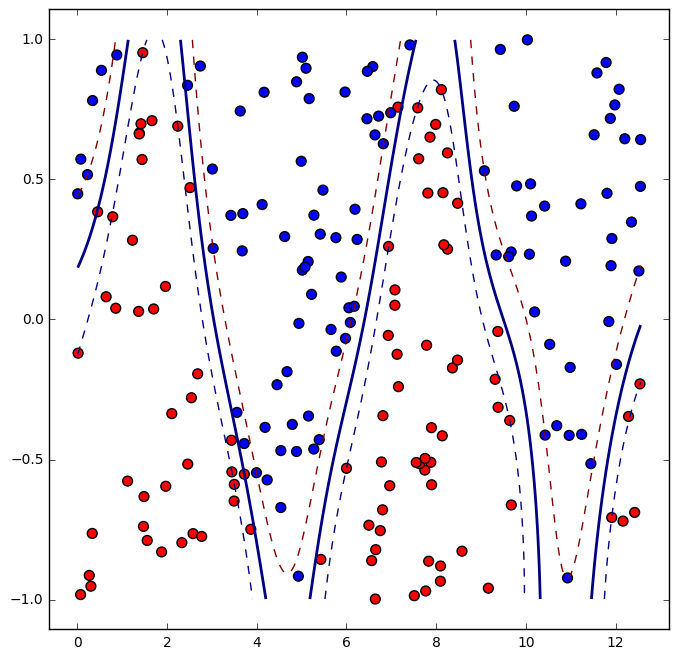

In [7]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = numpy.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * numpy.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = numpy.zeros(size, dtype=int)
    y[x[:, 1] > numpy.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Digits

Набор данных состоящий из 1797 изображений, представленных матрицей 8x8. Каждое избражение -- написанная цифра. 

Подробнее здесь -- http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

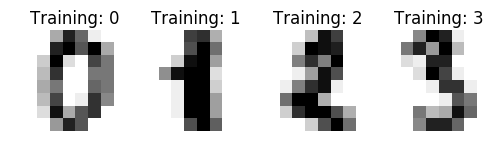

In [8]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Чтобы классифицировать эти объекты переведем матрицу 8x8 в строку длинной 64 для каждого изображения.

In [9]:
def matrix_to_string(data):
    n_samples = len(data)
    converted_data = data.reshape((n_samples, -1))
    return converted_data

In [10]:
X = matrix_to_string(digits.images)
y = digits.target

Разделите данные на обучающую и тестовую выборки

In [11]:
def split_data(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test


In [12]:
X_train, X_test, y_train, y_test = split_data( X, y, test_size=0.33)

Обучите классификатор

In [13]:
clf = select_model(X_train, y_train)

Best model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Предскажите метку для тестовых данных

In [22]:
def predict(clf, X_test):
    prediction = clf.predict(X_test)
    return prediction
predicted = predict(clf, X_test)

Classification report for classifier SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       0.98      1.00      0.99        55
          2       1.00      1.00      1.00        52
          3       0.98      0.98      0.98        56
          4       1.00      1.00      1.00        64
          5       1.00      0.99      0.99        73
          6       1.00      1.00      1.00        57
          7       0.98      0.98      0.98        62
          8       0.98      0.96      0.97        52
          9       0.96      0.97      0.96        68

avg / total       0.99      0.99      0.99       594


Confusion matrix:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0

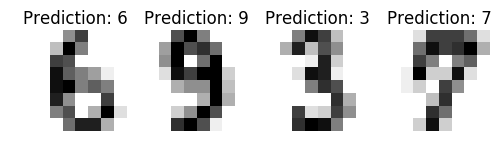

In [23]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

images_and_predictions = list(zip([X_test[i].reshape((8,8)) for i in range(len(X_test))], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()